In [29]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

np.random.seed(42)

In [30]:
from sklearn.datasets import make_blobs

from sklearn.datasets import load_iris

In [31]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [32]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [33]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

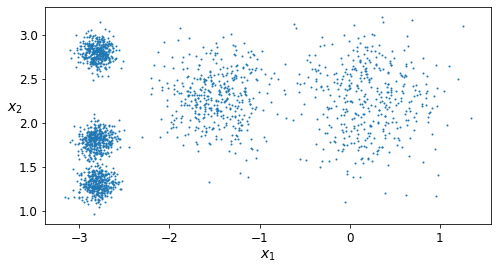

In [34]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [63]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)
kmeans.score(X)

-211.59853725816856

In [36]:
X[0]

array([-2.69823941,  1.3454702 ])

In [38]:
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80214068,  1.55162671],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063]])

In [43]:
X_new = np.array([[0, 2.1], [-3, 1.6], [-1.5, 2.7], [-2.4, 3], [-3, 1]]) #new pred should be = 0, 1, 2, 3, 4
kmeans.predict(X_new)

array([0, 1, 2, 3, 1], dtype=int32)

In [44]:
#distance from the centroid, which is the clusters centers
kmeans.transform(X_new)

array([[0.26031984, 2.85529432, 1.47852352, 2.87841889],
       [3.27503559, 0.20368673, 1.67961595, 1.21420242],
       [1.76562724, 1.73618304, 0.41547545, 1.29649271],
       [2.71291449, 1.5031641 , 1.17510642, 0.44251718],
       [3.44564568, 0.58603783, 2.00103321, 1.80830868]])

In [45]:
X_new_book = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new_book)

array([0, 0, 3, 3], dtype=int32)

In [46]:
kmeans.transform(X_new_book)

array([[0.32995317, 2.83778629, 1.49439034, 2.9042344 ],
       [2.80290755, 5.81943941, 4.4759332 , 5.84739223],
       [3.29399768, 1.4618254 , 1.69136631, 0.29040966],
       [3.21806371, 0.96879317, 1.54808703, 0.36159148]])

In [57]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=k)
minibatch_kmeans.fit(X)
minibatch_kmeans.score(X)

-262.1320013719166

In [69]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

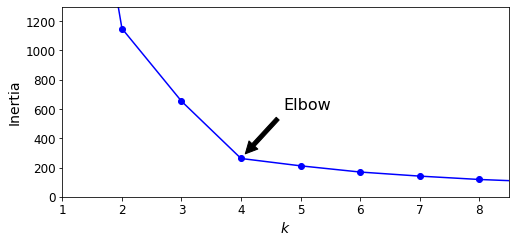

In [71]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

In [64]:
#silhouette score

from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [72]:
#Git code
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

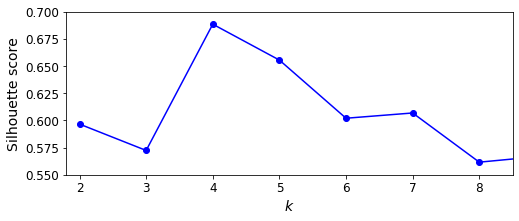

In [74]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

In [75]:
#This is another way to see how good the k we choose is
#even thought 4 still the highest score, 5 is not so bad, but we know 5 is the better one ;)

In [ ]:
#Now we'll see the silhouette diagram, this will help us the best

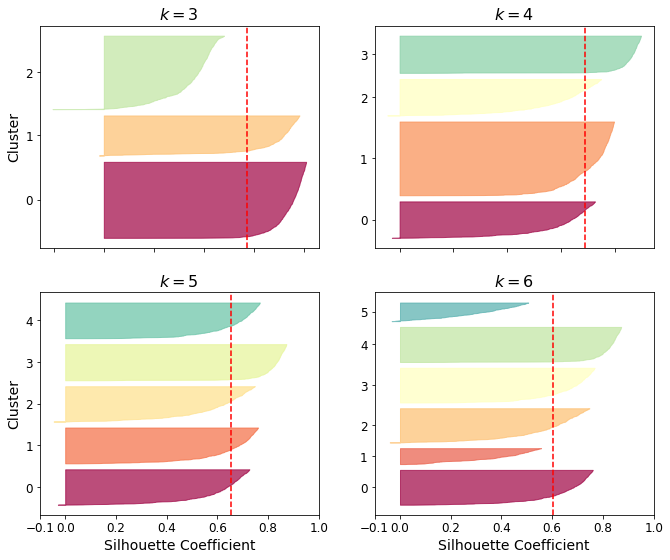

In [76]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

In [77]:
#k3 & k6 are visually bad, not all the "knifes" go beyond the mean(dashed line) and are thin compared to other
#on the other hand k4 & k5 are good, all the "knifes" are greater than the mean, but notice how well distributed the number of instances in each "knife" are, this let us conclude that k5 is the best choice!